In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import itertools

In [2]:
train_data = pd.read_csv(
    "data_acquisition/data_0.3/data_game_values_train.csv", sep=";"
)

In [3]:
test_data = pd.read_csv(
    "data_acquisition/data_0.3/data_game_values_test_odds.csv", sep=";"
)

In [4]:
train_data["elo_diff_home"] = train_data["elo_home"] - train_data["elo_away"]
train_data["elo_diff_away"] = train_data["elo_away"] - train_data["elo_home"]

test_data["elo_diff_home"] = test_data["elo_home"] - test_data["elo_away"]
test_data["elo_diff_away"] = test_data["elo_away"] - test_data["elo_home"]

[Text(0, 0, 'ELO Diff Home'), Text(1, 0, 'Home xG'), Text(2, 0, 'Form Home')]

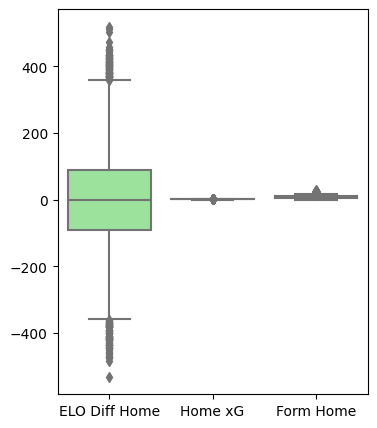

In [5]:
import seaborn as sns
boxplot_dict = {"ELO Diff Home": train_data["elo_diff_home"], "Home xG": train_data["home_xG"], "Form Home": train_data["ha_form_home_for"]}
fig = plt.figure(figsize=(4, 5))
bplot = sns.boxplot([train_data["elo_diff_home"], train_data["home_xG"], train_data["ha_form_home_for"]], color="lightgreen")
bplot.set_xticklabels(boxplot_dict.keys())

[Text(0, 0, 'Home xG'), Text(1, 0, 'Form Home For')]

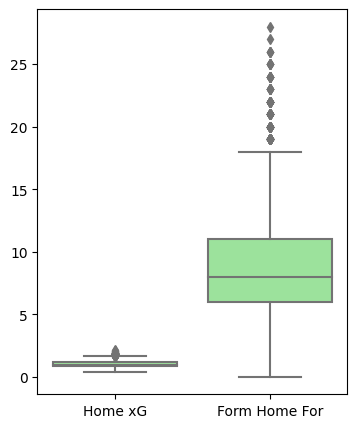

In [6]:
boxplot_dict = {"Home xG": train_data["home_xG"], "Form Home For": train_data["ha_form_home_for"]}
fig = plt.figure(figsize=(4, 5))
# ax = fig.subplots()
bplot = sns.boxplot([train_data["home_xG"], train_data["ha_form_home_for"]], color="lightgreen")
bplot.set_xticklabels(boxplot_dict.keys())

In [7]:
features = ["home_xG","away_xG","home_xg_against","away_xg_against","home_xT_all","away_xT_all","home_xt_all_against","away_xt_all_against","ha_form_home_for","ha_form_away_for","ha_form_home_against","ha_form_away_against","elo_diff_home","elo_diff_away"]

In [8]:
for f in features:
    category_mean = train_data[f].mean()
    category_std = train_data[f].std()
    train_data[f] = (train_data[f] - category_mean) / category_std
    test_data[f] = (test_data[f] - category_mean) / category_std

In [9]:
train_data_removed = train_data[features + ["game_id", "home_score", "away_score"]]
test_data_removed = test_data[features + ["game_id", "home_score", "away_score","bookie_home", "bookie_draw", "bookie_away", "bookie_home_odd", "bookie_draw_odd", "bookie_away_odd"]]

In [10]:
test_data_removed.describe()

,home_xG,away_xG,home_xg_against,away_xg_against,home_xT_all,away_xT_all,home_xt_all_against,away_xt_all_against,ha_form_home_for,ha_form_away_for,...,elo_diff_away,game_id,home_score,away_score,bookie_home,bookie_draw,bookie_away,bookie_home_odd,bookie_draw_odd,bookie_away_odd
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,...,1545.000000,1.545000e+03,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,0.110645,0.192504,0.201624,0.127847,0.002984,0.071140,0.086612,0.006683,0.005145,0.052896,...,-0.004212,1.560131e+06,1.540453,1.277670,43.730241,24.808331,31.461429,2.735644,4.010084,4.231683
std,1.018224,1.121409,1.066057,1.007277,0.973629,0.987061,0.980806,0.961172,0.965991,1.021737,...,0.972953,8.198898e+03,1.287576,1.215157,17.694041,4.542833,16.150673,1.775930,1.081604,3.159416
min,-2.292439,-1.876494,-2.335916,-2.457113,-2.287908,-1.927849,-2.205240,-2.930261,-2.222801,-1.984571,...,-3.122626,1.549639e+06,0.000000,0.000000,4.989605,7.326258,3.510787,1.070000,2.800000,1.140000
25%,-0.643795,-0.622471,-0.571193,-0.632629,-0.691734,-0.636171,-0.612775,-0.636246,-0.726528,-0.585262,...,-0.616784,1.557520e+06,1.000000,0.000000,30.594820,22.575070,18.918919,1.660000,3.400000,2.300000
50%,-0.008041,0.030676,0.097866,0.095001,-0.153866,-0.123368,0.036975,-0.070262,-0.227770,-0.025538,...,0.011260,1.558432e+06,1.000000,1.000000,42.307692,26.279863,29.287674,2.250000,3.600000,3.250000
75%,0.727338,0.768179,0.881099,0.797870,0.561209,0.588618,0.723315,0.621211,0.520366,0.534186,...,0.607018,1.560055e+06,2.000000,2.000000,57.069133,27.977618,41.555216,3.100000,4.200000,5.000000
max,4.152732,5.290749,4.091272,4.124523,3.902904,4.453772,3.809205,3.242032,3.512912,4.452252,...,2.944827,1.576160e+06,7.000000,6.000000,89.010613,33.880903,83.160083,19.000000,13.000000,27.000000


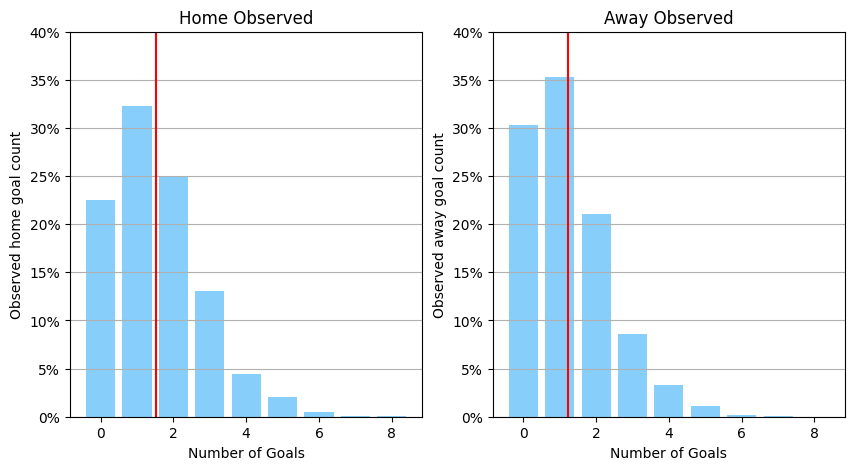

In [28]:
his_h, _ = np.histogram(train_data_removed.home_score, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
his_a, _ = np.histogram(train_data_removed.away_score, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
home_mean = train_data_removed.home_score.mean()
away_mean = train_data_removed.away_score.mean()
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
# fig.suptitle("Independent Poisson Model", fontsize=16)
ax1.bar(np.arange(len(his_h)), his_h / np.sum(his_h), color="lightskyblue")
ax1.set_title("Home Observed")
ax1.set_xlabel("Number of Goals")
ax1.set_ylabel("Observed home goal count")
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x * 100), ",") + "%")
)
ax1.set_ylim([0,0.4])
ax1.grid(axis="y")
ax1.vlines(x=home_mean, ymin=0, ymax=0.4, colors="r")

ax2.bar(np.arange(len(his_a)), his_a / np.sum(his_a), color="lightskyblue")
ax2.set_title("Away Observed")
ax2.set_xlabel("Number of Goals")
ax2.set_ylabel("Observed away goal count")
ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x * 100), ",") + "%")
)
ax2.set_ylim([0,0.4])
ax2.vlines(x=away_mean, ymin=0, ymax=0.4, colors="r")
ax2.grid(axis="y")

<AxesSubplot:>

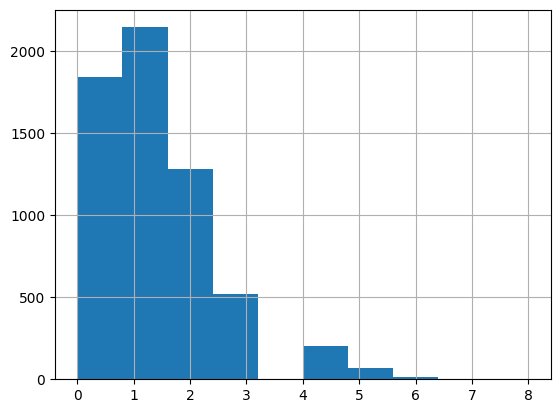

In [14]:
train_data_removed["away_score"].hist()

In [11]:
train_data_removed.describe()

,home_xG,away_xG,home_xg_against,away_xg_against,home_xT_all,away_xT_all,home_xt_all_against,away_xt_all_against,ha_form_home_for,ha_form_away_for,ha_form_home_against,ha_form_away_against,elo_diff_home,elo_diff_away,game_id,home_score,away_score
count,6.082000e+03,6.082000e+03,6.082000e+03,6.082000e+03,6.082000e+03,6.082000e+03,6.082000e+03,6.082000e+03,6.082000e+03,6.082000e+03,6.082000e+03,6.082000e+03,6.082000e+03,6.082000e+03,6.082000e+03,6082.000000,6082.000000
mean,6.542320e-17,1.869234e-16,5.233856e-16,-7.009629e-16,3.645007e-16,1.355195e-16,1.308464e-16,6.121743e-16,2.009427e-16,-5.607703e-17,9.346172e-18,-1.869234e-16,-1.255892e-17,1.255892e-17,1.343979e+06,1.534857,1.238737
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.048571e+05,1.276655,1.165851
min,-2.481010e+00,-2.489999e+00,-2.500011e+00,-3.055606e+00,-2.618795e+00,-2.358953e+00,-3.251793e+00,-2.951820e+00,-2.222801e+00,-1.984571e+00,-2.312885e+00,-2.413139e+00,-3.443479e+00,-3.366011e+00,1.190212e+06,0.000000,0.000000
25%,-7.070885e-01,-6.972947e-01,-7.173532e-01,-7.018797e-01,-6.975490e-01,-6.877112e-01,-7.199179e-01,-7.165791e-01,-7.265279e-01,-5.852620e-01,-7.153465e-01,-7.571236e-01,-5.799457e-01,-5.855206e-01,1.225497e+06,1.000000,0.000000
50%,-1.187139e-01,-1.317104e-01,-4.029591e-02,-3.624168e-02,-1.897166e-01,-1.958375e-01,-5.327174e-02,-3.651839e-02,-2.277703e-01,-2.553820e-02,-7.633095e-02,7.088391e-02,-1.535051e-03,1.535051e-03,1.317982e+06,1.000000,1.000000
75%,6.116862e-01,5.596329e-01,6.393162e-01,6.566823e-01,5.207674e-01,5.241539e-01,6.511839e-01,6.538697e-01,5.203660e-01,5.341856e-01,5.626846e-01,6.228889e-01,5.855206e-01,5.799457e-01,1.464041e+06,2.000000,2.000000
max,4.547193e+00,6.019382e+00,4.558616e+00,5.087869e+00,4.872131e+00,5.298951e+00,4.231366e+00,4.276920e+00,4.759806e+00,4.172390e+00,5.355301e+00,4.486924e+00,3.366011e+00,3.443479e+00,1.495694e+06,9.000000,8.000000


[Text(0, 0, 'Elo Diff Home'), Text(1, 0, 'Home xG'), Text(2, 0, 'Form Home')]

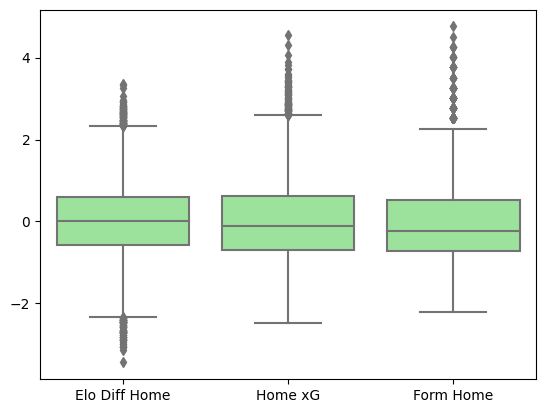

In [12]:
boxplot_dict = {"Elo Diff Home": train_data_removed["elo_diff_home"], "Home xG": train_data_removed["home_xG"], "Form Home": train_data_removed["ha_form_home_for"]}
bplot = sns.boxplot([train_data_removed["elo_diff_home"], train_data_removed["home_xG"], train_data_removed["ha_form_home_for"]], color="lightgreen")
bplot.set_xticklabels(boxplot_dict.keys())

In [13]:
# data_corr = all_data[["home_xG","away_xG","home_xg_against","away_xg_against","home_xT_all","away_xT_all","home_xt_all_against","away_xt_all_against","ha_form_home_for","ha_form_away_for","ha_form_home_against","ha_form_away_against","elo_diff_home","elo_diff_away"]]
data_corr = train_data_removed[["home_xG","away_xG","home_xg_against","away_xg_against","home_xT_all","away_xT_all","home_xt_all_against","away_xt_all_against","ha_form_home_for","ha_form_away_for","ha_form_home_against","ha_form_away_against","elo_diff_home"]]

In [14]:
import seaborn as sns

[Text(0, 0.5, 'Home xG'),
 Text(0, 1.5, 'Away xG'),
 Text(0, 2.5, 'Home $\\overline{xG}$'),
 Text(0, 3.5, 'Away $\\overline{xG}$'),
 Text(0, 4.5, 'Home xT'),
 Text(0, 5.5, 'Away xT'),
 Text(0, 6.5, 'Home $\\overline{xT}$'),
 Text(0, 7.5, 'Away $\\overline{xT}$'),
 Text(0, 8.5, 'Form Home'),
 Text(0, 9.5, 'Form Away'),
 Text(0, 10.5, '$\\overline{Form Home}$'),
 Text(0, 11.5, '$\\overline{Form Away}$'),
 Text(0, 12.5, 'ELO Diff')]

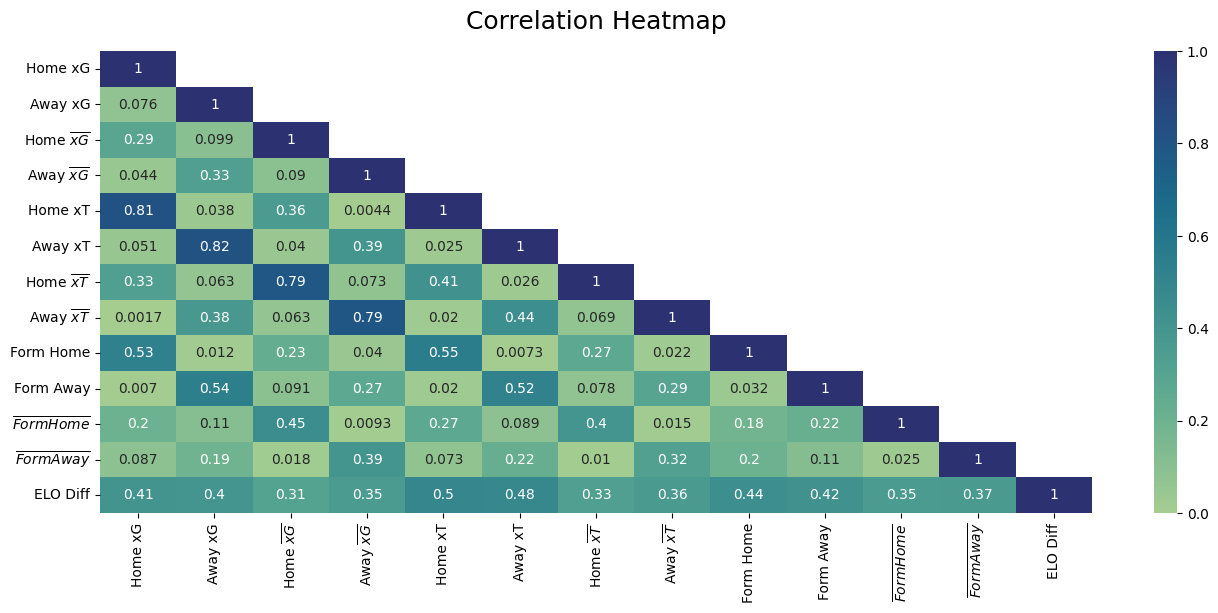

In [15]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(data_corr.corr(), dtype=bool), k=1)
heatmap = sns.heatmap(data_corr.corr().abs(), mask=mask, vmin=0, vmax=1, annot=True, cmap='crest')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
# heatmap.set_xticks(range(len(data_corr.corr()))) # <--- set the ticks first
heatmap.set_xticklabels(['Home xG',"Away xG", "Home $\overline{xG}$","Away $\overline{xG}$","Home xT","Away xT","Home $\overline{xT}$","Away $\overline{xT}$","Form Home","Form Away","$\overline{Form Home}$","$\overline{Form Away}$","ELO Diff"])
# heatmap.set_xticks(range(len(data_corr.corr()))) # <--- set the ticks first
heatmap.set_yticklabels(['Home xG',"Away xG", "Home $\overline{xG}$","Away $\overline{xG}$","Home xT","Away xT","Home $\overline{xT}$","Away $\overline{xT}$","Form Home","Form Away","$\overline{Form Home}$","$\overline{Form Away}$","ELO Diff"])

In [17]:
# training_standardized = all_data_removed[all_data_removed["game_id"].isin(train_data["game_id"])]
# test_standardized = all_data_removed[all_data_removed["game_id"].isin(test_data["game_id"])]

In [16]:
# train_data_removed.to_csv("data_acquisition/data_0.3/training_standardized.csv", sep=";", index=False)
# test_data_removed.to_csv("data_acquisition/data_0.3/test_standardized.csv", sep=";", index=False)

In [11]:
import math
n = 16
fact = 0
for x in range(7):
    if x < 5:
        continue
    m = x+1
    fact += math.factorial(n) / (math.factorial(m)*math.factorial(n-m))

print(fact)

19448.0


In [19]:
explore_data["home_xG_norm2"] = explore_data["home_xG"] / explore_data["home_xG"].std()
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
hist, bins = np.histogram(explore_data["home_xG_norm2"], bins=10)
hist = hist / explore_data["home_xG_norm2"].count()
width = 0.95 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color="black")

fig.show()

NameError: name 'explore_data' is not defined

In [ ]:
import itertools
# how to round
error1 = np.arange(0, 3, 0.1)
error2 = np.arange(0, 3, 0.1)

errors = []
for x,y in itertools.product(error1, error2):
    errors.append(x-y)

errors = np.array(np.round(errors, 1))

In [ ]:
np.unique(errors)

array([-4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. , -3.9,
       -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9, -2.8,
       -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8, -1.7,
       -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6,
       -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,
        0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,
        1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,
        2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,
        3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

In [ ]:
int_rounding = []
for x,y in itertools.product(error1, error2):
    int_rounding.append(int(x-y))

In [ ]:
bankers_rounding = []
for x,y in itertools.product(error1, error2):
    bankers_rounding.append(np.rint(x-y))

In [ ]:
my_rounding = []
for x,y in itertools.product(error1, error2):
    if ((x-y) >= 0.5) or ((y-x) >= 0.5):
        x = int(x)
        y = int(y)
    else:
        c = max(x,y)
        x = int(c)
        y = int(c)
    my_rounding.append(x-y)

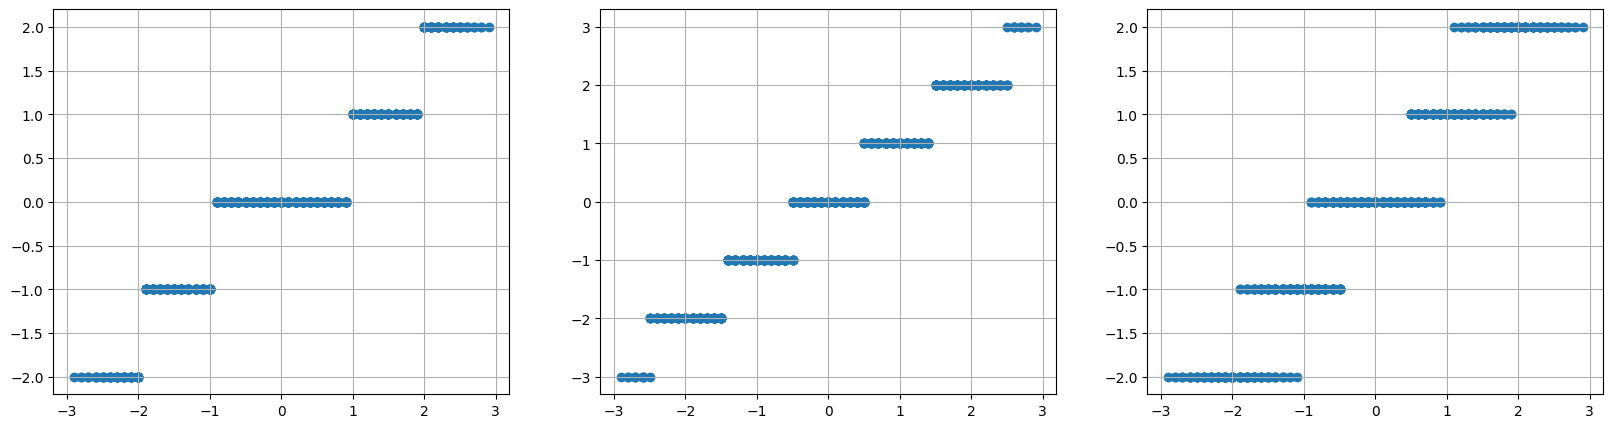

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = fig.subplots(1, 3)
ax[0].scatter(errors, int_rounding)
ax[0].grid()
ax[1].scatter(errors, bankers_rounding)
ax[1].grid()
ax[2].scatter(errors, my_rounding)
ax[2].grid()

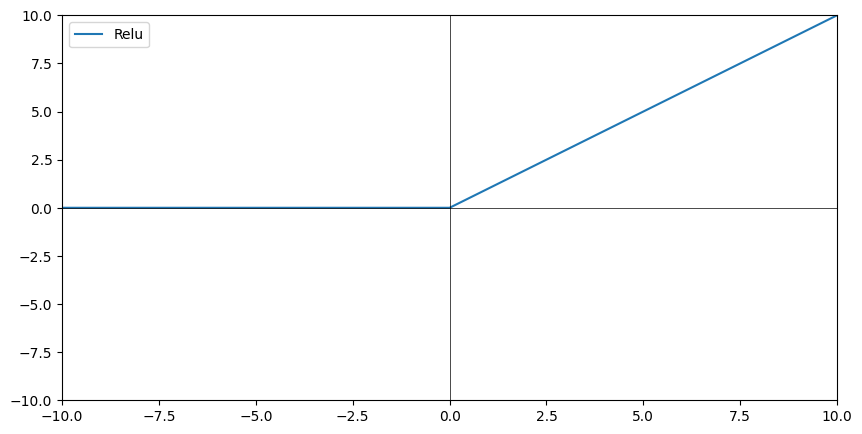

In [ ]:
x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['Relu'])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
# plt.grid()
plt.show()

